In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

(1000, 2) (1000,)


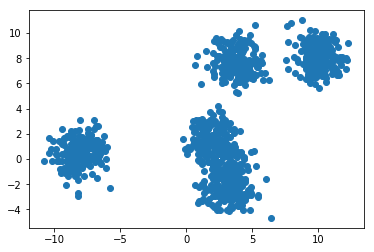

In [2]:
data_X, data_Y = make_blobs(1000, 2, 5)
print(data_X.shape, data_Y.shape)
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [3]:
def initialize_clusters(k=5):
    # Number of clusters
    k = 5

    # Generate random cluster centers
    clusters = {}

    colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']

    for kx in range(k):
        cluster_id = kx
        points = []
        dim = data_X.shape[1]
        center = 10.0*(np.random.random((dim,))*2 - 1)
        color = colors[kx]
        clusters[cluster_id] = {
            'points': points,
            'center': center,
            'color': color
        }

    return clusters

In [4]:
def calc_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
calc_distance(4, 6)

2.0

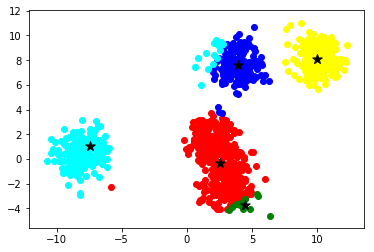

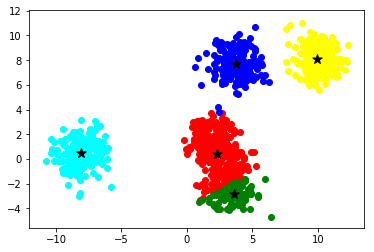

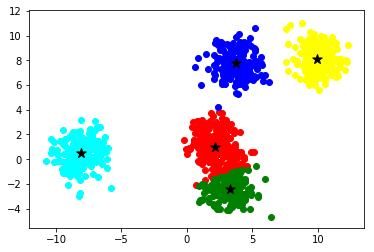

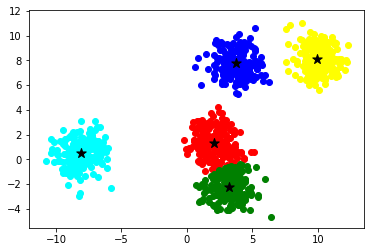

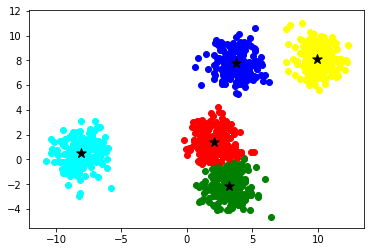

In [5]:
clusters = initialize_clusters()
def alloc_clusters(k=5):
    # Get the right cluster
    for i in range(data_X.shape[0]):
        dist = []
        for j in range(k):
            dst = calc_distance(data_X[i, :], clusters[j]['center'])
            dist.append(dst)
        aloc_clus = np.argmin(np.asarray(dist))
        clusters[aloc_clus]['points'].append(data_X[i, :])
#     print(np.asarray(clusters[0]['points']).shape)
#     print(np.asarray(clusters[1]['points']).shape)
#     print(np.asarray(clusters[2]['points']).shape)
#     print(np.asarray(clusters[3]['points']).shape)
#     print(np.asarray(clusters[4]['points']).shape)
    
    for kx in range(k):
        pts = np.asarray(clusters[kx]['points'])
        if pts.shape[0] > 0:
            # Compute new cluster center
            new_center = pts.mean(axis=0)
        else:
            new_center = clusters[kx]['center']
        clusters[kx]['points'] = pts
        clusters[kx]['center'] = new_center
    
    
    plt.figure(0)

    for kx in range(k):
        cc = clusters[kx]['center']

        pts = clusters[kx]['points']
        try:
            plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
        except:
            pass

        plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')

        clusters[kx]['points'] = []
    plt.show()
        

for i in range(5):
    alloc_clusters()